<a href="https://colab.research.google.com/github/Jieoi/traffic_sign/blob/main/test_data_preparation_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>3.1 Praposition of testing data</h1>

In [ ]:
import os
import shutil

import sys

import pandas as pd

from PIL import Image
import numpy as np

import zipfile

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


<h2>Extract the zip file</h2>

In [ ]:
# Define the path to the getFile.py script
script_path = '/content/drive/MyDrive/final/data_preparation/getFile.py'

# Add the script directory to sys.path to import the module
script_dir = os.path.dirname(script_path)
sys.path.append(script_dir)

In [ ]:
# Import the extract_zip_to_directory function from getFile.py
from getFile import extract_zip_to_directory

# Define file paths
root_path = '/content/drive/MyDrive'
zip_filename = os.path.join(root_path, 'GTSRB/GTSRB.zip')
extract_dir = "/content/GTSRB"

# Call the function
extract_zip_to_directory(zip_filename, extract_dir)

Extraction complete.



<h2>Prepare the testing data</h2>


In [ ]:
# Assign the paths
ground_truth = os.path.join(extract_dir, 'GTSRB', 'GTSRB_Final_Test_GT', 'GT-final_test.csv')
test_directory = os.path.join(extract_dir, 'GTSRB', 'GTSRB_Final_Test_Images', 'GTSRB', 'Final_Test', 'Images')

print("ground_truth:", ground_truth)
print("test_directory:", test_directory)

ground_truth: /content/GTSRB/GTSRB/GTSRB_Final_Test_GT/GT-final_test.csv
test_directory: /content/GTSRB/GTSRB/GTSRB_Final_Test_Images/GTSRB/Final_Test/Images


In [ ]:
# Define the path to the getFile.py script
script_path = '/content/drive/MyDrive/final/data_preparation/getData.py'

# Add the script directory to sys.path to import the module
script_dir = os.path.dirname(script_path)
sys.path.append(script_dir)

import getData

In [ ]:
images = getData.load_testing_images(test_directory)
labels = getData.load_ground_truth(ground_truth)

Skipping file: /content/GTSRB/GTSRB/GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/GT-final_test.test.csv
Loaded 12630 test images in 1.0089199542999268 seconds.


In [ ]:
images.shape

(12630, 32, 32, 3)

In [ ]:
labels["ClassId"]

0        16
1         1
2        38
3        33
4        11
         ..
12625    12
12626    33
12627     6
12628     7
12629    10
Name: ClassId, Length: 12630, dtype: int64

In [ ]:
# Create a directory named 'test_images' if it doesn't exist
if not os.path.exists('test_images'):
    os.makedirs('test_images')

images = (images * 255).astype(np.uint8)  # Convert to uint8 in the range 0-255

for i in range(images.shape[0]):
    img = Image.fromarray(images[i])
    img.save(f'test_images/image_{i}.png')

print("Images saved to 'test_images' folder.")

Images saved to 'test_images' folder.


<h2>Load data enhancement model</h2>

In [ ]:
# Copy RRDBNet_arch.py and RRDB_ESRGAN_x4.pth to the /content/models directory
# Create the /content/models directory if it doesn't exist
models_directory = '/content/models'
os.makedirs(models_directory, exist_ok=True)

# Copy RRDBNet_arch.py
source_arch_path = '/content/drive/MyDrive/final/pre-trained-model/RRDBNet_arch.py'
target_arch_path = os.path.join(models_directory, 'RRDBNet_arch.py')
shutil.copy(source_arch_path, target_arch_path)

# Copy RRDB_ESRGAN_x4.pth
source_model_path = '/content/drive/MyDrive/final/pre-trained-model/RRDB_ESRGAN_x4.pth'
target_model_path = os.path.join(models_directory, 'RRDB_ESRGAN_x4.pth')
shutil.copy(source_model_path, target_model_path)


'/content/models/RRDB_ESRGAN_x4.pth'

In [ ]:
# Define the path to the getFile.py script
script_path = '/content/drive/MyDrive/final/data_augmentation/enhancing_image_RRDB.py'

# Add the script directory to sys.path to import the module
script_dir = os.path.dirname(script_path)
sys.path.append(script_dir)

import enhancing_image_RRDB

In [ ]:
# Call the function with the desired inputs
img_folder = '/content/test_images/*'
output_dir = '/content/test_images_enhanced'
model_path = '/content/drive/MyDrive/final/pre-trained-model/RRDB_ESRGAN_x4.pth'

enhancing_image_RRDB.enhance_images_rrdb(img_folder, output_dir, model_path)

1 image_3157
2 image_11794
3 image_11626
4 image_2323
5 image_11779
6 image_1333
7 image_11240
8 image_3862
9 image_815
10 image_1699
11 image_5656
12 image_1854
13 image_4279
14 image_5603
15 image_6339
16 image_8805
17 image_8201
18 image_11173
19 image_610
20 image_3352
21 image_8655
22 image_3895
23 image_8192
24 image_7707
25 image_11353
26 image_10256
27 image_8789
28 image_11871
29 image_11293
30 image_10471
31 image_9159
32 image_10997
33 image_4518
34 image_2741
35 image_8101
36 image_2111
37 image_4553
38 image_11614
39 image_5550
40 image_10075
41 image_3369
42 image_1898
43 image_7842
44 image_9891
45 image_3914
46 image_3932
47 image_8825
48 image_11590
49 image_12539
50 image_2562
51 image_2387
52 image_3478
53 image_3221
54 image_10671
55 image_12373
56 image_2836
57 image_7603
58 image_4329
59 image_7149
60 image_12396
61 image_7057
62 image_9289
63 image_7131
64 image_8596
65 image_6577
66 image_6883
67 image_11031
68 image_8913
69 image_5397
70 image_4123
71 image_619

KeyboardInterrupt: ignored

In [ ]:
# Define the source and destination paths
source_folder = '/content/test_images_enhance'
destination_folder = '/content/drive/My Drive/final'
zip_filename = 'test_images_enhance.zip'

# Zip the folder
shutil.make_archive(zip_filename, 'zip', source_folder)

# Move the zip file to the destination folder in Google Drive
shutil.move(f'{zip_filename}.zip', destination_folder)

print(f"'{zip_filename}.zip' saved to Google Drive.")

'test_images_enhance.zip.zip' saved to Google Drive.


In [ ]:
# Define the source and destination paths for the CSV file
csv_filename = 'labels.csv'
csv_file_path = os.path.join(destination_folder, csv_filename)

# Save the DataFrame to a CSV file
labels.to_csv(csv_file_path, index=False)

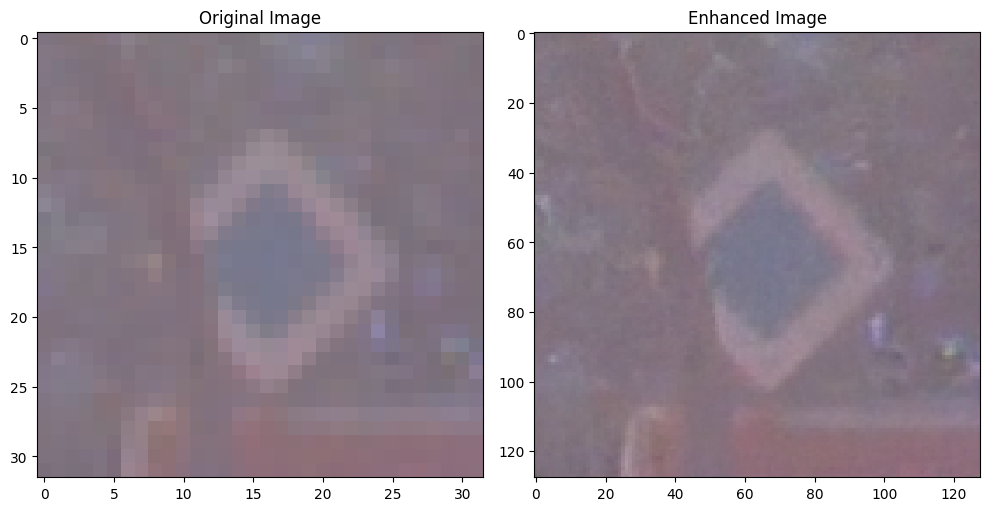

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the image number (e.g., 10043)
image_number = 10043

# Define the paths to the original and enhanced images
original_image_path = f'test_images/image_{image_number}.png'
enhanced_image_path = f'test_images_enhanced/image_{image_number}_enhanced.png'

# Load and display the original image
original_image = mpimg.imread(original_image_path)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image)

# Load and display the enhanced image
enhanced_image = mpimg.imread(enhanced_image_path)
plt.subplot(1, 2, 2)
plt.title('Enhanced Image')
plt.imshow(enhanced_image)

# Show the images side by side
plt.tight_layout()
plt.show()

In [ ]:
# # Specify the path to the folder you want to delete entries from
# folder_path = '/content/test_images_enhanced'  # Replace with your folder path

# # List all files in the folder
# folder_contents = os.listdir(folder_path)

# # Iterate through the files and delete them
# for item in folder_contents:
#     item_path = os.path.join(folder_path, item)
#     if os.path.isfile(item_path):
#         os.remove(item_path)
#     elif os.path.isdir(item_path):
#         shutil.rmtree(item_path)

# print("All entries in 'test_images_enhance' have been deleted.")